Реализовать минимум 5 классификаторов, сравнить метрики между собой, выбрать лучший для Вашего датасета.

In [1]:
# main.py
import pandas as pd
import numpy as np
import kagglehub
import sys
sys.path.append('/content/sample_data')
import loader_dataset as loader
import csv
import mdl_analysis as analysis
import mdl_visualization as visual
import mdl_classifier as classifier

# Загрузка датасета с сайта https://www.kaggle.com/
file_path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
print(file_path)
print("Path to dataset files:", file_path)
sys.path.append(file_path)
path = file_path+'/heart.csv'

dataset = loader.load_csv_file(path)


/root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2
Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2
Данные успешно загружены.


In [2]:
# Статистическая информация данных
analysis.statistic_data(dataset)

Первые 5 записей:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Последние 5 записей:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   

In [3]:
# Распределение по классу
columns = ['age', 'sex', 'target']
for column in columns:
  analysis.analysis_feature(dataset, column)


Распределение по age:
       0   1   2   3   4   5   6   7   8   9   ...  31  32  33  34  35  36  \
age    29  34  35  37  38  39  40  41  42  43  ...  65  66  67  68  69  70   
count   4   6  15   6  12  14  11  32  26  26  ...  27  25  31  12   9  14   

       37  38  39  40  
age    71  74  76  77  
count  11   3   3   3  

[2 rows x 41 columns]

Распределение по sex:
         0    1
sex      0    1
count  312  713

Распределение по target:
          0    1
target    0    1
count   499  526


График сохранен: sample_data/outputs/visual_by_age.png


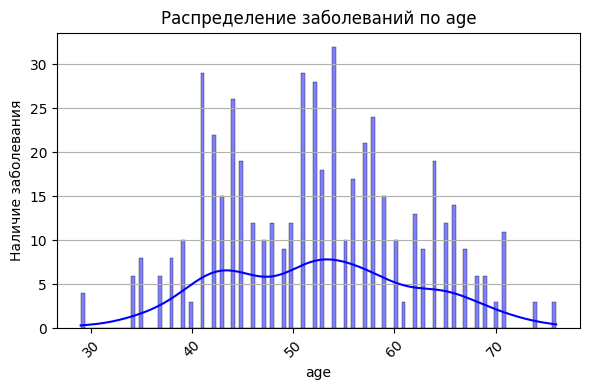

График сохранен: sample_data/outputs/visual_by_sex.png


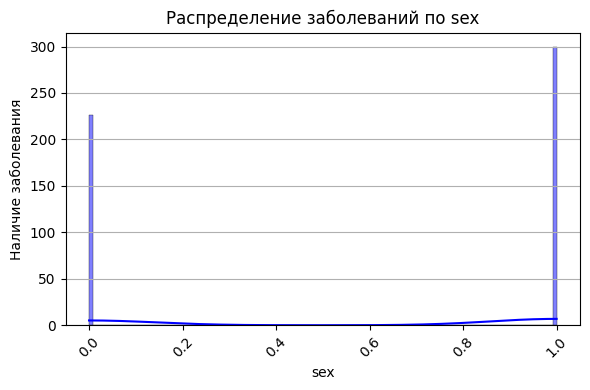

In [4]:
# Визуализация распределения заболеваний по классу
columns = ['age', 'sex']
dataset_disease = dataset[(dataset['target'] == 1)]
for column in columns:
  visual.visual_by_feature(dataset_disease, column)

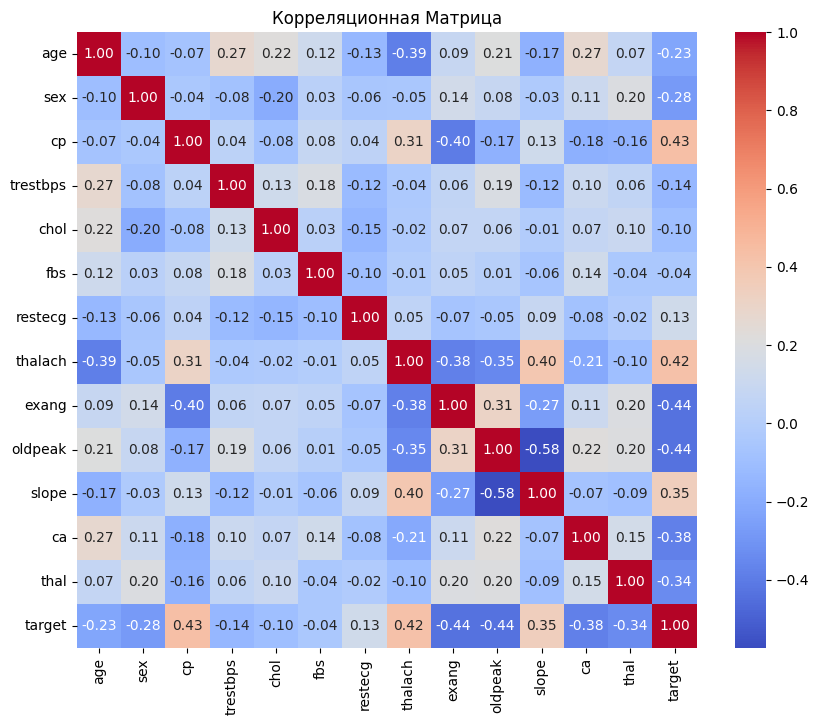

График сохранен: sample_data/outputs/correlation_matrix.png


In [5]:
# Матрица корреляции
analysis.corr_data(dataset)

Метрики модели: Gradient Boosting
    0   1
0  93   5
1   9  98
График сохранен: sample_data/outputs/matrix_Gradient Boosting.png


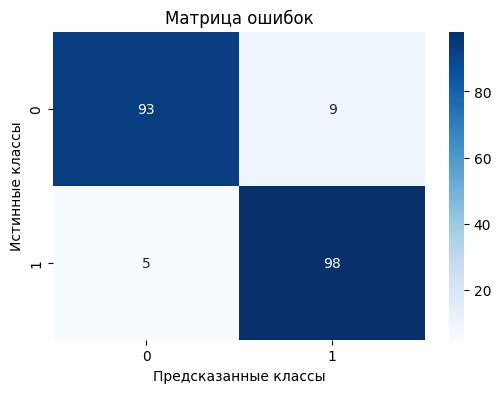

Метрики модели: ExtraTreesClassifier
     0    1
0  102    3
1    0  100
График сохранен: sample_data/outputs/matrix_ExtraTreesClassifier.png


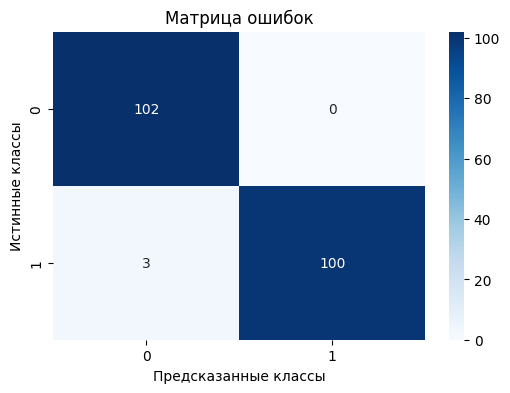

Метрики модели: Quadratic Discriminant Analysis
    0   1
0  78  14
1  24  89
График сохранен: sample_data/outputs/matrix_Quadratic Discriminant Analysis.png


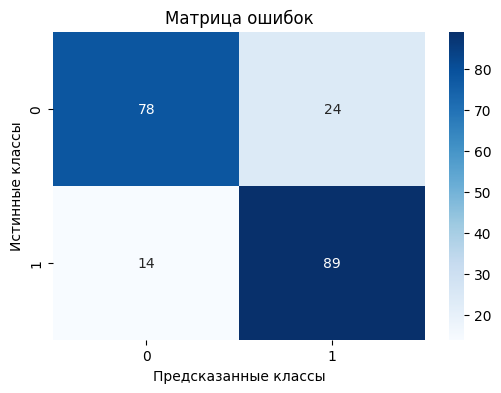

[LightGBM] [Info] Number of positive: 423, number of negative: 397
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515854 -> initscore=0.063436
[LightGBM] [Info] Start training from score 0.063436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
М

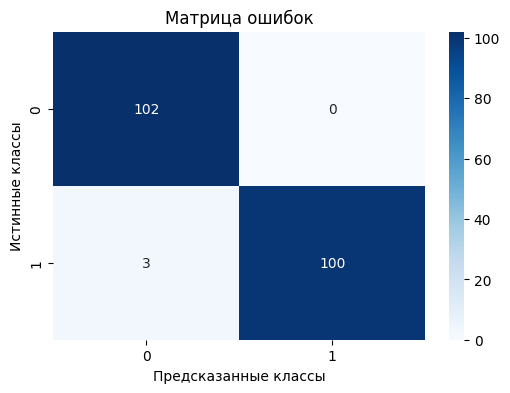

Метрики модели: SVC
    0   1
0  66  32
1  36  71
График сохранен: sample_data/outputs/matrix_SVC.png


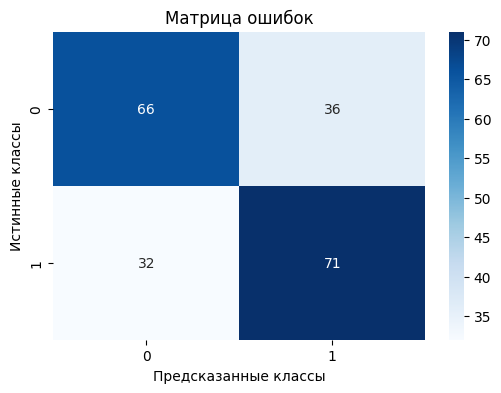

Сравнение моделей по метрикам:
                                 Accuracy  Recall  Precision  Time(s)
Gradient Boosting                   0.932   0.932      0.932     0.54
ExtraTreesClassifier                0.985   0.985      0.986     0.47
Quadratic Discriminant Analysis     0.815   0.815      0.818     0.01
Light Gradient Boosting Machine     0.985   0.985      0.986     0.26
SVC                                 0.668   0.668      0.668     0.15


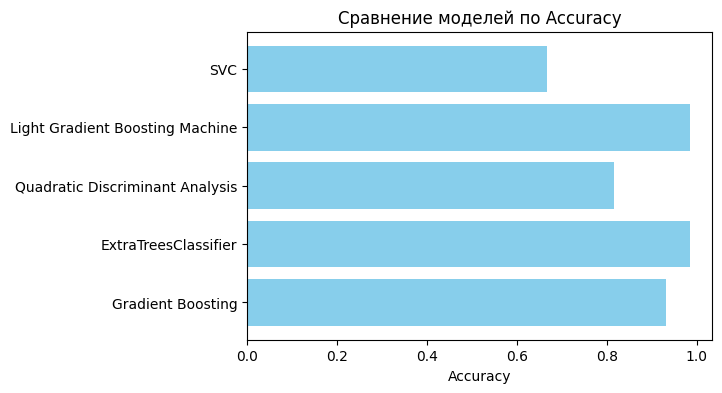

График сохранен: sample_data/outputs/metrics_Accuracy.png


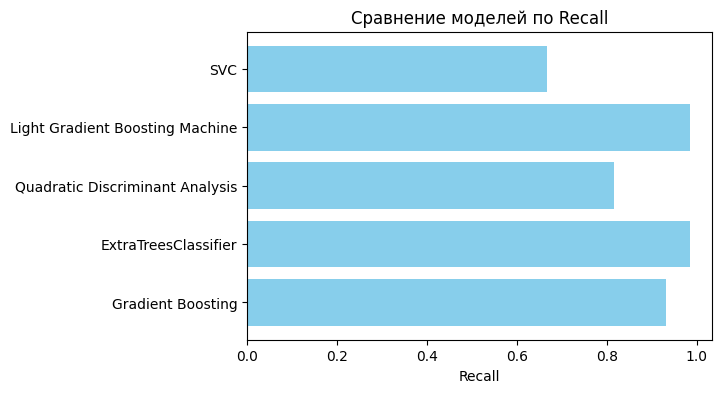

График сохранен: sample_data/outputs/metrics_Recall.png


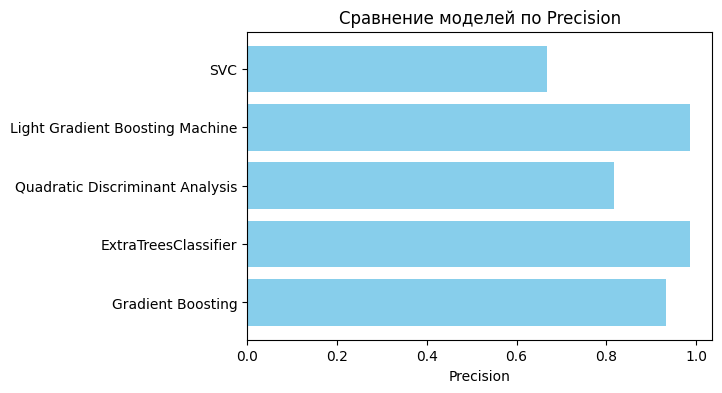

График сохранен: sample_data/outputs/metrics_Precision.png


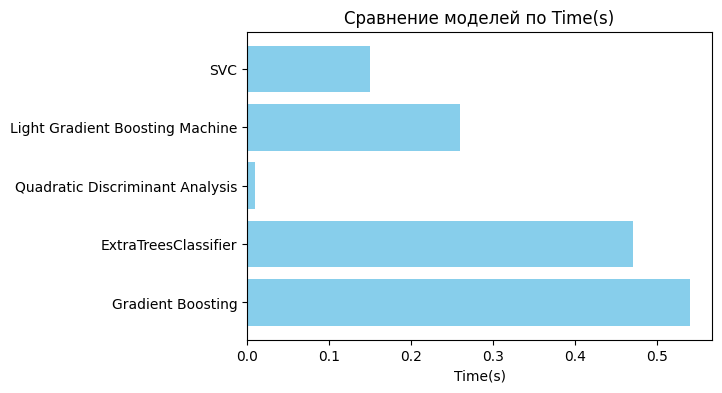

График сохранен: sample_data/outputs/metrics_Time(s).png


In [2]:
metrix = classifier.classifier_data(dataset)
visual.visual_metrics(metrix)

График сохранен: sample_data/outputs/important__feature_RandomForestClassifier.png


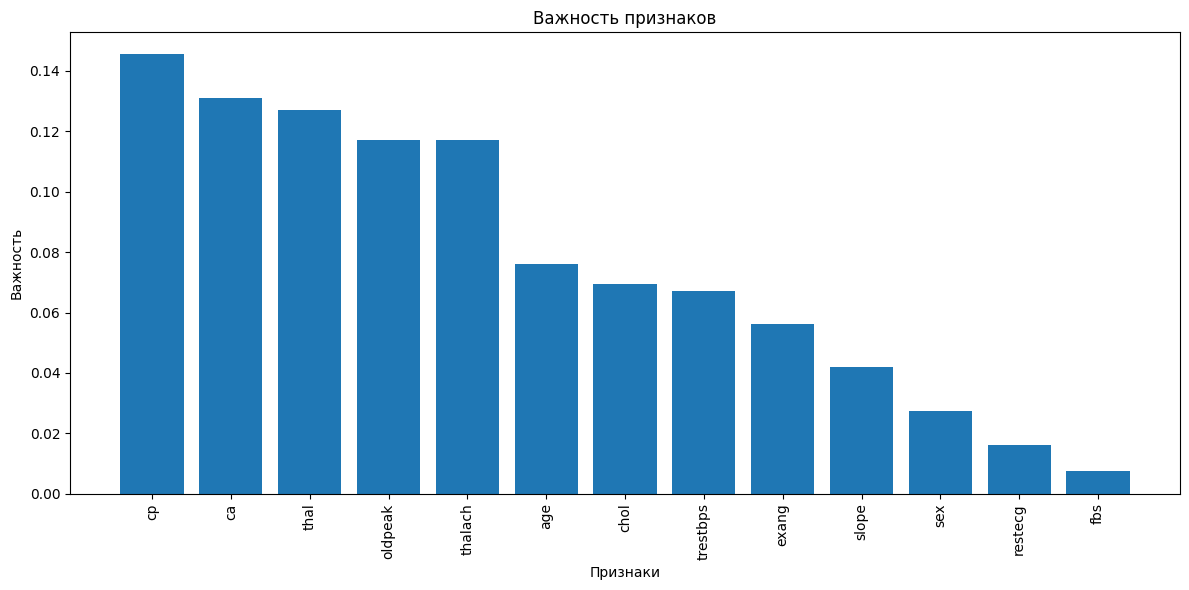

Важность признаков:
Признак cp, важность: 0.145515543631222
Признак ca, важность: 0.13098688637744915
Признак thal, важность: 0.12715875166003754
Признак oldpeak, важность: 0.11722507533856275
Признак thalach, важность: 0.11715169423800946
Признак age, важность: 0.07608968730883649
Признак chol, важность: 0.06929866994385385
Признак trestbps, важность: 0.06724506599160497
Признак exang, важность: 0.056303585500750375
Признак slope, важность: 0.04207542559386878
Признак sex, важность: 0.027275183908893906
Признак restecg, важность: 0.01611684895435007
Признак fbs, важность: 0.007557581552560656


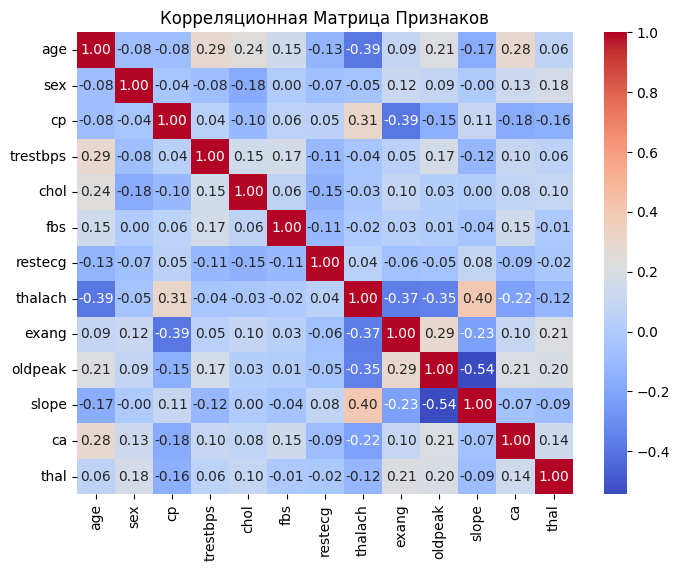

Accuracy: 0.985
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

График сохранен: sample_data/outputs/matrix_RandomForestClassifier.png


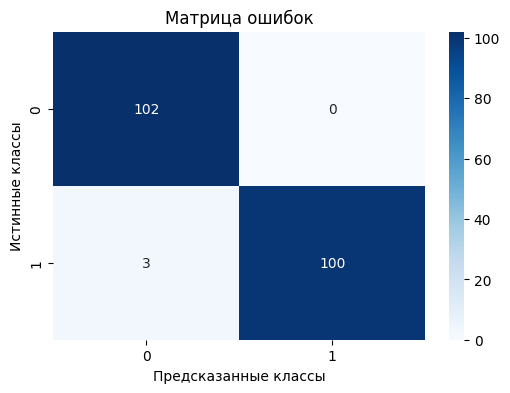

In [7]:
# Создадим и обучим модель Random Forest Classifier с дополнительными настройками
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

dataset.scaler = StandardScaler()
# Разделение на признаки и целевую переменную
X = dataset.drop('target', axis=1)  # Все столбцы, кроме target
y = dataset['target']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_classifier.fit(X_train, y_train)

# Визуализация важности признаков
feature_names = dataset.drop('target', axis=1)
feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]

fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names.columns)[indices], rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.tight_layout()
name_file = f'important__feature_RandomForestClassifier.png'
visual.save_plot(fig, name_file)
plt.show()

# Вывод важности признаков
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
print("Важность признаков:")
for idx in indices:
    print(f"Признак {feature_names.columns[idx]}, важность: {importances[idx]}")

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Создание DataFrame из масштабированных данных для удобства
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Корреляционная Матрица
corr_matrix = X_train_scaled_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная Матрица Признаков')
plt.show()

# Сделаем предсказания на тестовом наборе данных
y_pred = rf_classifier.predict(X_test)

# Оценим качество модели
accuracyRF = accuracy_score(y_test, y_pred)
conf_matrixRF = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracyRF:.3f}')
print("Confusion Matrix:\n", conf_matrixRF)
print("Classification Report:\n", class_report)

# Визуализация матрицы ошибок
target_names = dataset['target'].unique()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrixRF, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
name_file = f'matrix_RandomForestClassifier.png'
visual.save_plot(fig, name_file)
plt.show()

In [ ]:
!pip install catboost

Accuracy: 0.889
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



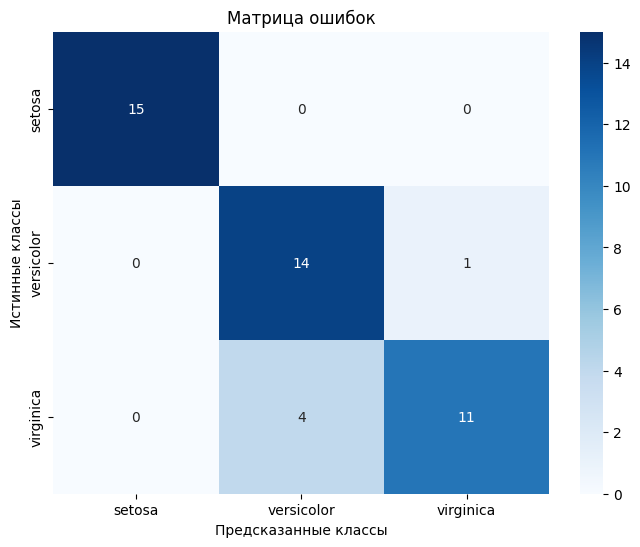

In [ ]:
# Добавим пример для CatBoost на датасете ирисы
from sklearn.datasets import load_iris

# Загрузка данных
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Создание и обучение классификатора CatBoost
clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=0)
clf.fit(X_train, y_train)

# Прогнозирование и оценка точности
y_pred = clf.predict(X_test)

# Оценим качество модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Визуализация матрицы ошибок
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'max_depth': 10, 'max_features': None, 'min_samples_split': 6, 'n_estimators': 150}
Лучшая точность (CV): 0.9846930846930848
Accuracy: 0.981
Confusion Matrix:
 [[147   3]
 [  3 155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       150
           1       0.98      0.98      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

График сохранен: sample_data/outputs/matrix_ExtraTreesClassifier_best.png


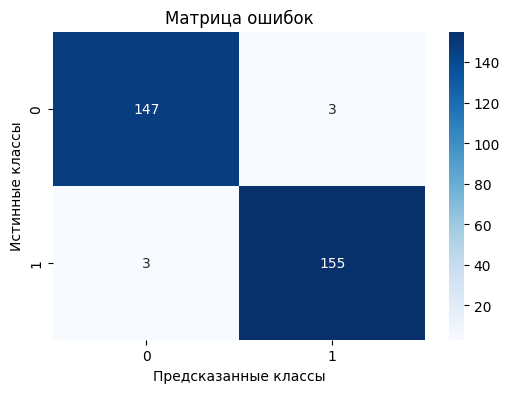

In [8]:
# Классификатор ExtraTrees с подбором параметров
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Разделение на признаки и целевую переменную
X = dataset.drop('target', axis=1)  # Все столбцы, кроме target
y = dataset['target']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Создание и обучение классификатора Extra Trees с использованием GridSearchCV для подбора гиперпараметров
param_grid = {
    'n_estimators': [125, 150, 175],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 7, 10, 12],
    'min_samples_split': [6, 7, 8]
}
# Инициализация ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=42)

# Настройка GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", grid_search.best_score_)

# Использование лучшей модели для прогнозирования
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Оценим качество модели
accuracyET = accuracy_score(y_test, y_pred)
conf_matrixET = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracyET:.3f}')
print("Confusion Matrix:\n", conf_matrixET)
print("Classification Report:\n", class_report)

# Визуализация матрицы ошибок
target_names = dataset['target'].unique()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrixET, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
name_file = f'matrix_ExtraTreesClassifier_best.png'
visual.save_plot(fig, name_file)
plt.show()

Accuracy: 0.737
Confusion Matrix:
 [[ 80  70]
 [ 11 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.53      0.66       150
           1       0.68      0.93      0.78       158

    accuracy                           0.74       308
   macro avg       0.78      0.73      0.72       308
weighted avg       0.78      0.74      0.73       308

График сохранен: sample_data/outputs/matrix_KNeighborsClassifier.png


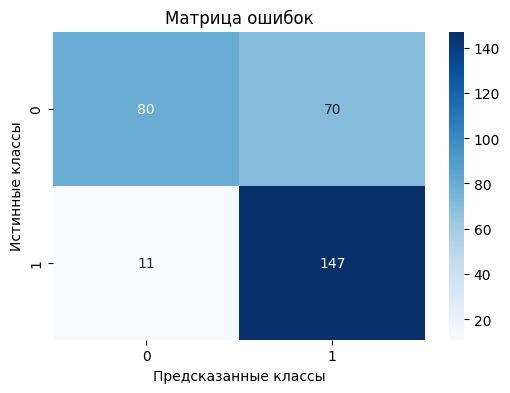

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


График сохранен: sample_data/outputs/place_KNeighborsClassifier.png


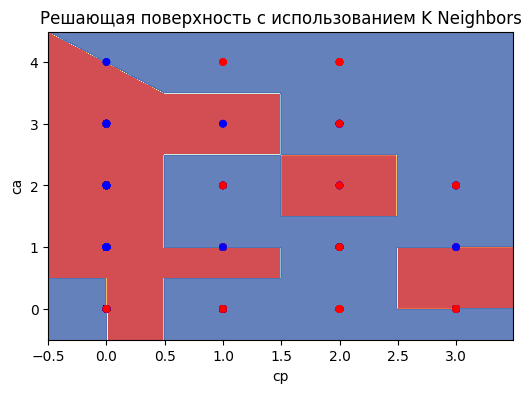

In [9]:
# Классификатор K Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Разделение на признаки и целевую переменную
X = dataset[['cp', 'ca']] # Берем только два признака (cp и ca)
y = dataset['target']  # Только столбец target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Создание и обучение модели K Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # Задаем количество соседей (K=3)
knn.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = knn.predict(X_test)

# Оценим качество модели
accuracyKN = accuracy_score(y_test, y_pred)
conf_matrixKN = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracyKN:.3f}')
print("Confusion Matrix:\n", conf_matrixKN)
print("Classification Report:\n", class_report)

# Визуализация матрицы ошибок
target_names = dataset['target'].unique()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrixKN, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
name_file = f'matrix_KNeighborsClassifier.png'
visual.save_plot(fig, name_file)
plt.show()

# Создание и обучение модели K Neighbors
knn = KNeighborsClassifier(n_neighbors=3)  # Задаем количество соседей (K=3)
knn.fit(X_train, y_train)

# Создаем сетку для визуализации решающей поверхности
x_min, x_max = X['cp'].min() - 0.5, X['cp'].max() + 0.5
y_min, y_max = X['ca'].min() - 0.5, X['ca'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация решающей поверхности
fig, ax = plt.subplots(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X['cp'], X['ca'], c=y, cmap=plt.cm.bwr, s=20)
plt.xlabel('cp')
plt.ylabel('ca')
plt.title('Решающая поверхность с использованием K Neighbors')
name_file = f'place_KNeighborsClassifier.png'
visual.save_plot(fig, name_file)
plt.show()

